<a href="https://colab.research.google.com/github/igmim-yassine/Prediction-of-the-abundance-of-the-northern-shoveler-/blob/main/projet_semaine2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projet Robin 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
features = pd.read_csv('features.csv')
response = pd.read_csv('response.csv')

Concatenation

We are gonna merge the two dataframes into one baptised "data" created form "features" and " response"

In [5]:
# data = pd.concat([features, response], axis=1)
data = pd.merge(features ,response , left_on = 'names(response)' , right_on = 'Unnamed: 0')

In [6]:
data.drop(['names(response)' , 'Unnamed: 0'] , axis = 1 , inplace = True)

In [7]:
data

,algeria,morocco,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri,x
0,1,0,36.831024,3.676812,12.23,8121.33,2077.128,0.064,3,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,261.164593,2.705933,36.396158,2
1,1,0,33.493796,5.990477,40.08,2345.41,434513.588,0.343,2,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,263.494258,1.853971,37.017541,0
2,1,0,36.147910,5.163528,849.96,17563.14,69422.228,15.399,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,223.941148,1.827560,37.387474,4
3,1,0,35.172772,7.031942,935.64,8203.38,235988.172,5.334,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,197.605263,-1.009665,37.515919,0
4,1,0,35.728593,2.802241,629.23,5748.02,122453.152,23.814,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,203.566507,2.771483,37.694043,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,0,0,36.611366,10.887952,-1.75,6304.45,965.154,3.427,3,0,2008,0.92,1.71,0.35,0.51,66.71,59.31,0.38,223.319617,1.170622,37.644043,81950
3954,0,0,33.245830,11.261433,0.00,15055.88,6075.019,301.550,4,0,2008,0.92,1.71,0.35,0.51,66.71,59.31,0.38,295.745933,6.762105,37.740067,1720
3955,0,0,36.474304,10.815580,0.05,3875.75,1255.895,0.593,3,0,2008,0.92,1.71,0.35,0.51,66.71,59.31,0.38,217.846890,1.160287,37.737005,4
3956,0,0,35.796711,10.142059,27.01,45208.10,50569.922,0.815,3,0,2008,0.92,1.71,0.35,0.51,66.71,59.31,0.38,304.188038,5.597799,37.897182,58


check whether the concat was well done!

In [8]:
data.shape , features.shape , response.shape

((3958, 22), (3958, 22), (3958, 2))

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3958 entries, 0 to 3957
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   algeria               3958 non-null   int64  
 1   morocco               3958 non-null   int64  
 2   latitude              3958 non-null   float64
 3   longitude             3958 non-null   float64
 4   alt                   3958 non-null   float64
 5   dist_towns            3958 non-null   float64
 6   dist_coast            3958 non-null   float64
 7   area                  3958 non-null   float64
 8   ecosystem             3958 non-null   int64  
 9   dam                   3958 non-null   int64  
 10  year                  3958 non-null   int64  
 11  anomalies_t_print_NW  3958 non-null   float64
 12  anomalies_print_NE    3958 non-null   float64
 13  anomalies_hiv_SW      3958 non-null   float64
 14  anomalies_hiv_SE      3958 non-null   float64
 15  p_NW_Europe          

No non values column's types are so every thing is fine so let's discover if there is a need for feature scaling 

In [10]:
data.describe()

,algeria,morocco,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri,x
count,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000
mean,0.571248,0.259222,34.954423,2.680387,321.290672,17710.358287,92526.353661,18.735779,2.755937,0.374432,1998.970440,0.432087,0.921630,0.497324,0.435546,59.652686,48.457102,-0.013921,253.148624,3.301786,37.995254,415.286761
std,0.494960,0.438263,2.122943,6.589067,463.975522,21518.994001,130839.640284,82.683594,0.904351,0.484037,5.462523,0.445301,0.893692,0.425899,0.543289,5.638959,3.807682,0.952113,43.734319,1.580027,0.522871,1905.565491
min,0.000000,0.000000,23.730332,-15.794121,-20.390000,1346.220000,387.773000,0.001300,1.000000,0.000000,1990.000000,-0.450000,-1.450000,-0.360000,-0.530000,50.420000,42.450000,-2.030000,184.249282,-1.009665,36.396158,0.000000
25%,0.000000,0.000000,33.704636,-2.737155,4.470000,6271.400000,4977.167000,0.343000,2.000000,0.000000,1994.000000,0.080000,0.490000,0.210000,0.100000,55.560000,46.110000,-0.650000,219.215072,2.395694,37.701742,0.000000
50%,1.000000,0.000000,35.666973,5.371082,60.490000,12972.360000,27904.633000,1.400000,3.000000,0.000000,1999.000000,0.500000,0.920000,0.420000,0.410000,60.610000,47.310000,0.030000,260.405502,3.333541,38.052871,4.000000
75%,1.000000,1.000000,36.520958,7.296992,601.500000,22015.700000,144649.586000,7.953000,3.000000,1.000000,2004.000000,0.700000,1.670000,0.830000,0.730000,61.840000,49.860000,0.520000,279.521890,3.986651,38.380703,151.500000
max,1.000000,1.000000,37.154047,11.261433,2075.520000,216852.920000,785528.593000,1056.132000,4.000000,1.000000,2008.000000,1.380000,2.530000,1.600000,1.710000,72.860000,59.310000,1.340000,361.539234,6.762105,38.788880,81950.000000


In [11]:
from termcolor import colored
for i in list(data.columns):
  if (data[i].max() - data[i].min()) > 10 :
    print(colored(i , 'green') , colored(np.round(data[i].max() - data[i].min(), 2),'red'))
  else:
    print(colored(i , 'green') , colored(np.round(data[i].max() - data[i].min(), 2),'blue'))

algeria 1
morocco 1
latitude 13.42
longitude 27.06
alt 2095.91
dist_towns 215506.7
dist_coast 785140.82
area 1056.13
ecosystem 3
dam 1
year 18
anomalies_t_print_NW 1.83
anomalies_print_NE 3.98
anomalies_hiv_SW 1.96
anomalies_hiv_SE 2.24
p_NW_Europe 22.44
p_NE_Europe 16.86
NAO 3.37
rain 177.29
economy 7.77
agri 2.39
x 81950


As we can see we do have rnages of values diffenrent from a columns to another so we do need to think about feature scaling in order to wind up with a better performance of the model ;)

Since we will be using the algorithms that need to be optimized using distances such as KNN thus we need to ensure the mean is zero and the variance to be one, i.e implement standarization to some column where we do find values and much bigger compared to other ones.

#Data exploration
 

In [12]:
features.head()

,names(response),algeria,morocco,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri
0,X19903,1,0,36.831024,3.676812,12.23,8121.33,2077.128,0.064,3,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,261.164593,2.705933,36.396158
1,X19904,1,0,33.493796,5.990477,40.08,2345.41,434513.588,0.343,2,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,263.494258,1.853971,37.017541
2,X19905,1,0,36.147910,5.163528,849.96,17563.14,69422.228,15.399,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,223.941148,1.827560,37.387474
3,X19906,1,0,35.172772,7.031942,935.64,8203.38,235988.172,5.334,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,197.605263,-1.009665,37.515919
4,X199012,1,0,35.728593,2.802241,629.23,5748.02,122453.152,23.814,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,203.566507,2.771483,37.694043


In [13]:
features.describe().alt

count    3958.000000
mean      321.290672
std       463.975522
min       -20.390000
25%         4.470000
50%        60.490000
75%       601.500000
max      2075.520000
Name: alt, dtype: float64

In [14]:
response.x.value_counts(dropna = False)

0        1891
10         39
2          37
50         37
6          35
         ... 
655         1
5600        1
22000       1
1538        1
2039        1
Name: x, Length: 682, dtype: int64

In [ ]:
liste_features = list(features.columns)
for i in liste_features:
  print(i , features[i].value_counts)
  print('----------------')

# Data cleaning

We perceive negative values within some columns of the dataset, these columns are colored by green and red ones are for those with all positive values

In [16]:
from termcolor import colored
liste_features = list(features.select_dtypes(include=np.number).columns)
columns_to_clean = []
for i in liste_features:
  if (features[i] >= 0).all() :
    print(colored(i , 'green')) #columns with only positive values
  else:
    print(colored(i, 'red'))  #columns with negative values
    columns_to_clean += [i]

algeria
morocco
latitude
longitude
alt
dist_towns
dist_coast
area
ecosystem
dam
year
anomalies_t_print_NW
anomalies_print_NE
anomalies_hiv_SW
anomalies_hiv_SE
p_NW_Europe
p_NE_Europe
NAO
rain
economy
agri


There we go, columns with negative values 

In [17]:
columns_to_clean

['longitude',
 'alt',
 'anomalies_t_print_NW',
 'anomalies_print_NE',
 'anomalies_hiv_SW',
 'anomalies_hiv_SE',
 'NAO',
 'economy']

#Data visualization

In [18]:
def diagnostic_plots(data, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)

    plt.show()

In [19]:
def split_plots(n):
  #split plots
  string = ''
  for i in range(n):
    string+= '-'
  return string

histogram and Q-Q plot for algeria variable


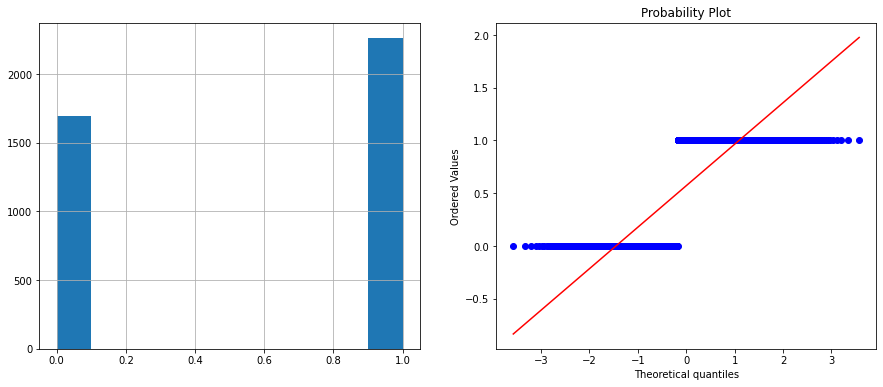

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for morocco variable


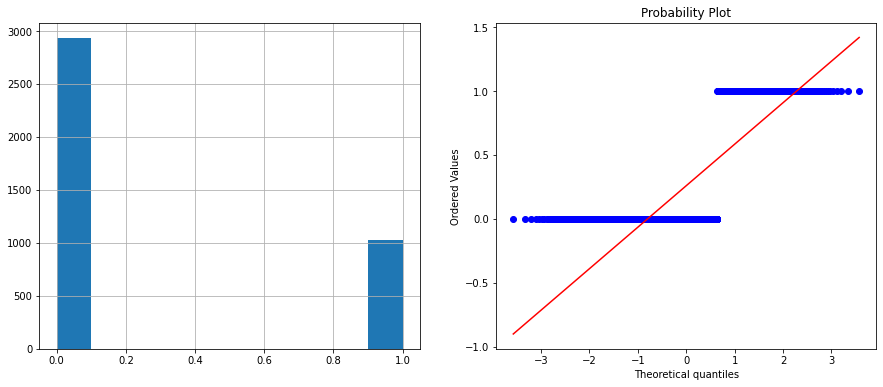

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for latitude variable


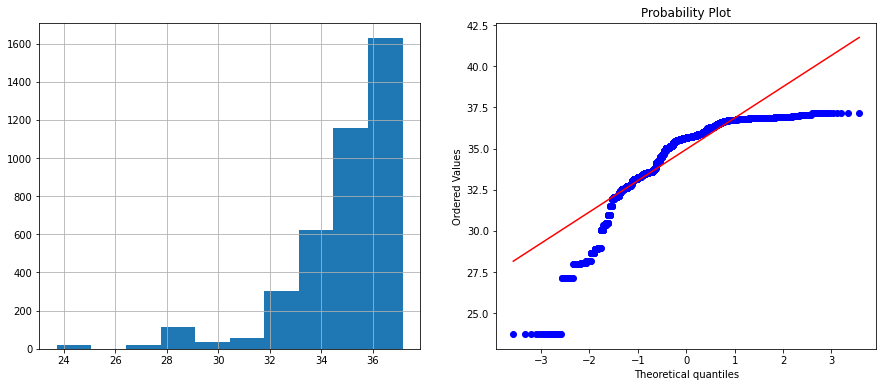

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for longitude variable


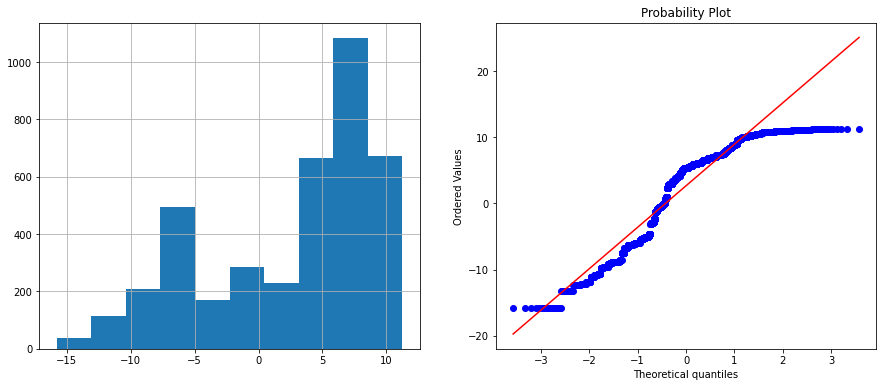

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for alt variable


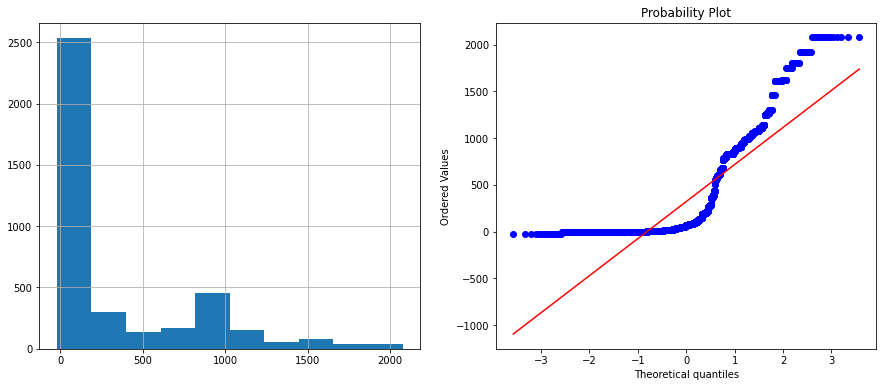

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for dist_towns variable


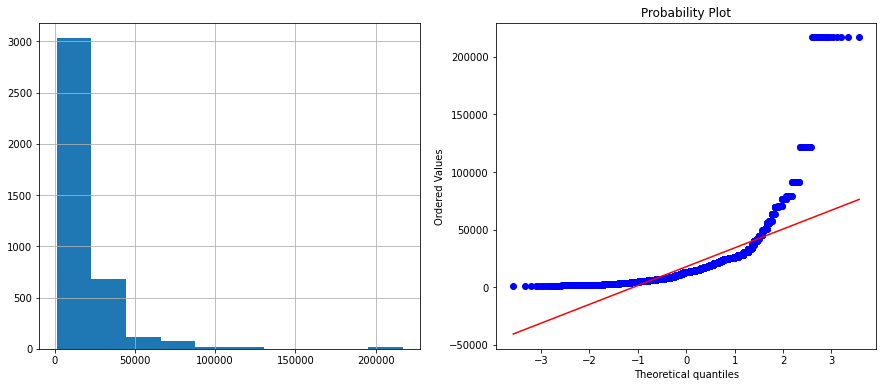

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for dist_coast variable


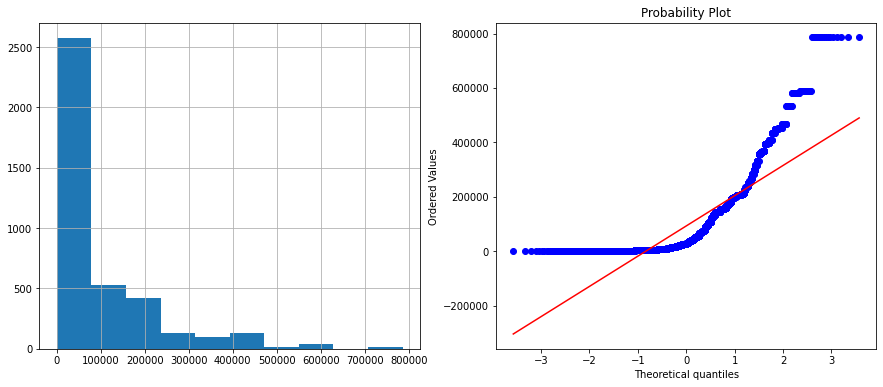

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for area variable


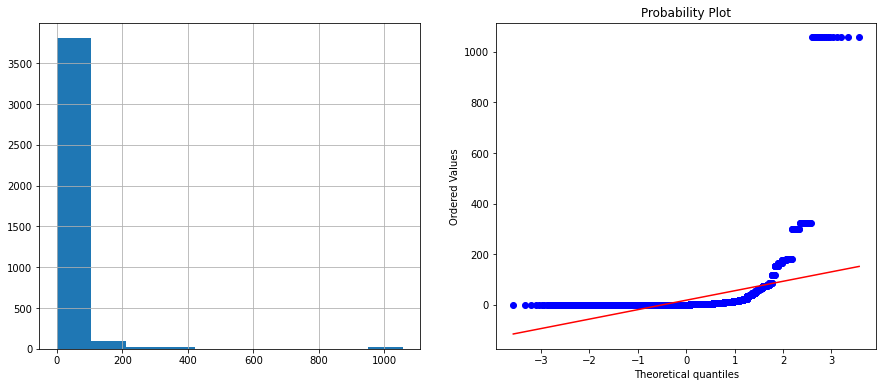

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for ecosystem variable


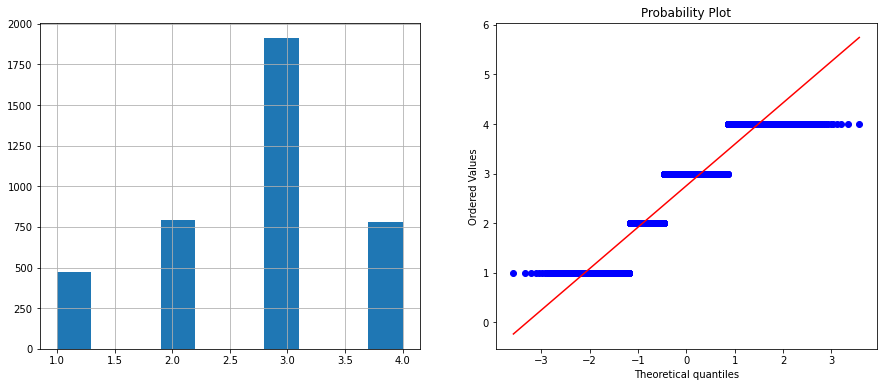

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for dam variable


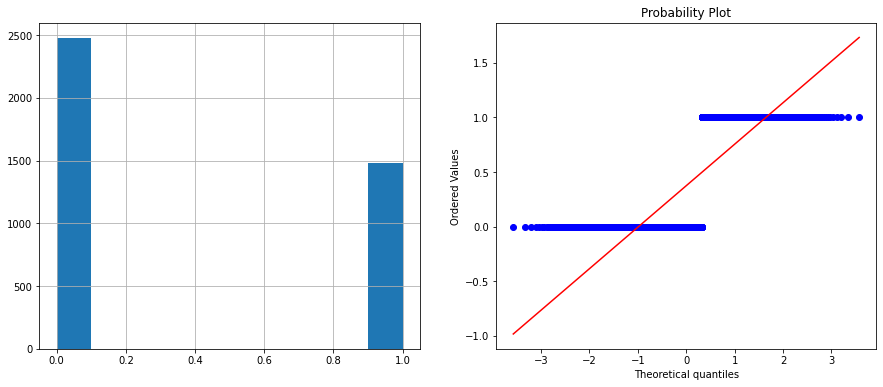

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for year variable


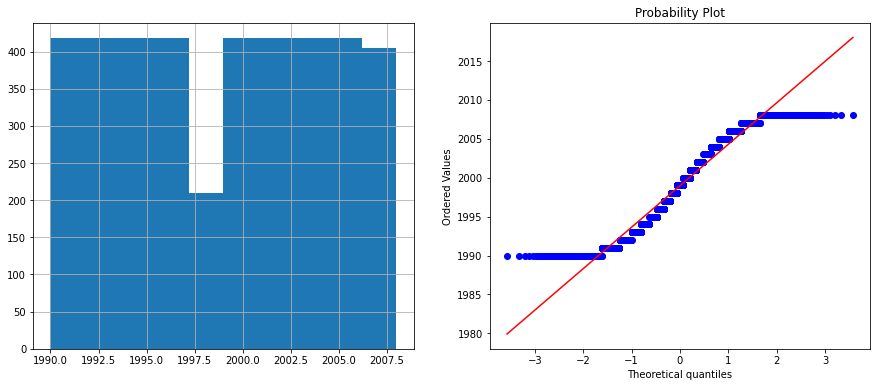

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for anomalies_t_print_NW variable


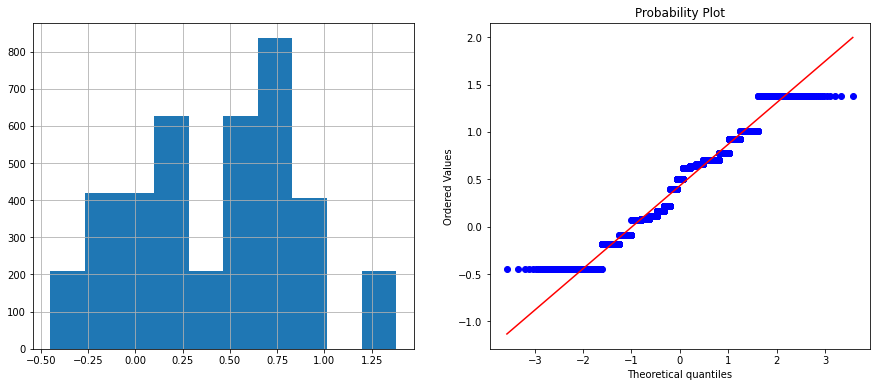

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for anomalies_print_NE variable


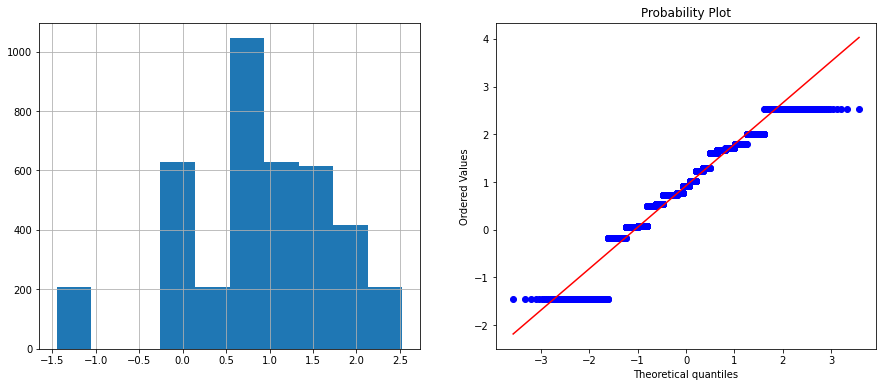

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for anomalies_hiv_SW variable


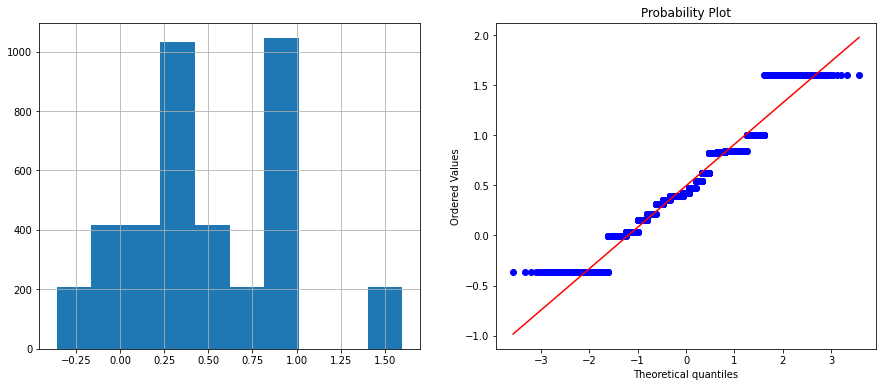

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for anomalies_hiv_SE variable


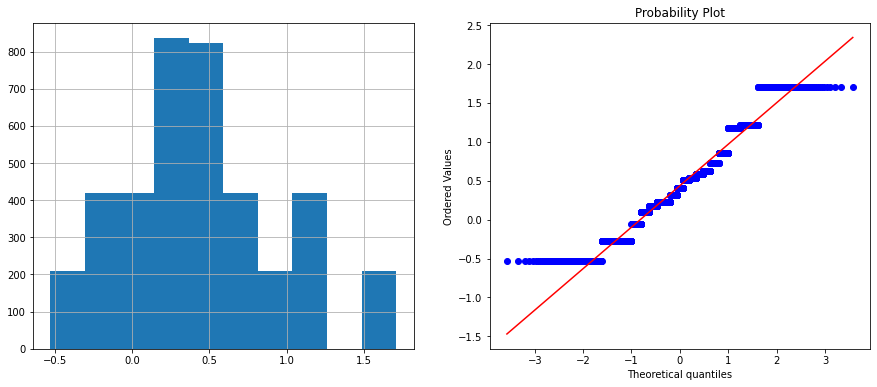

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for p_NW_Europe variable


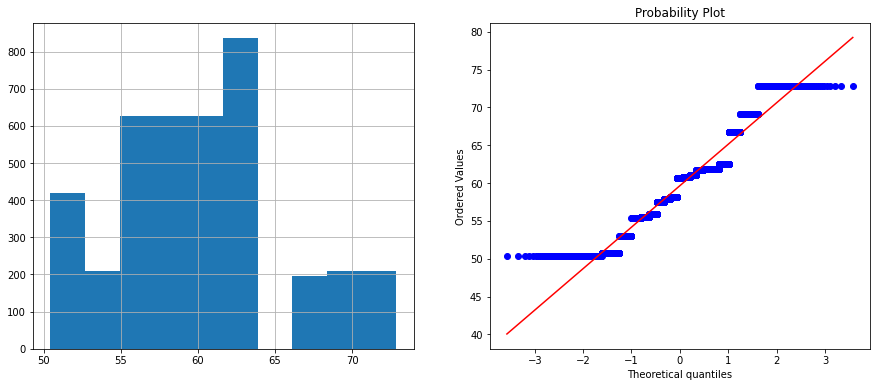

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for p_NE_Europe variable


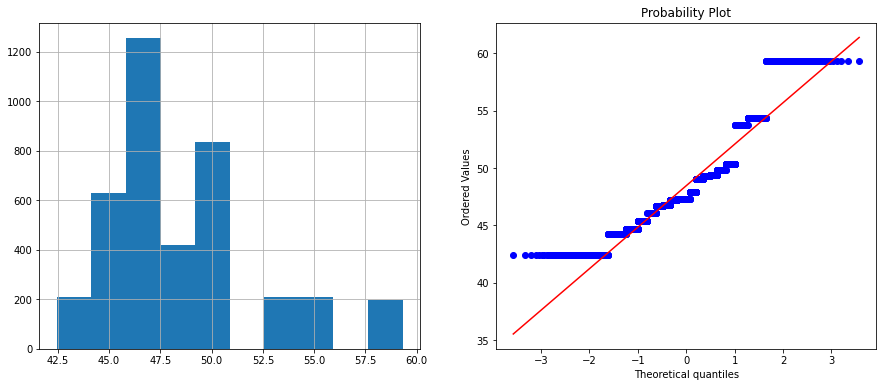

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for NAO variable


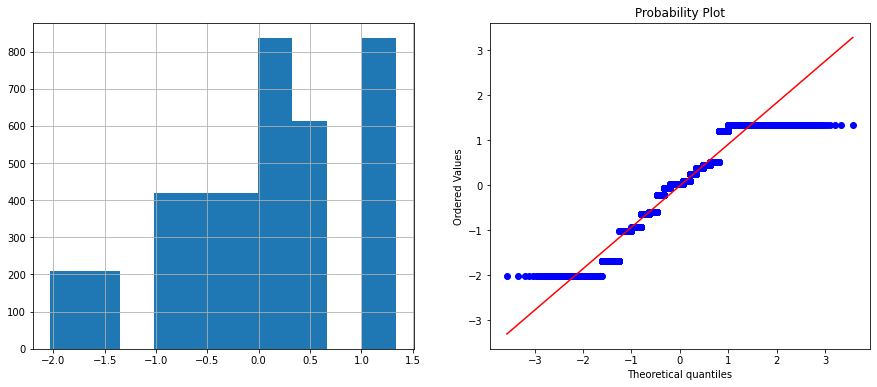

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for rain variable


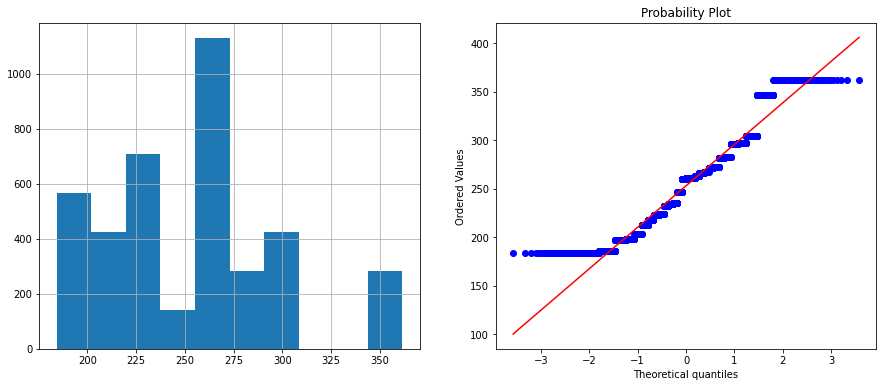

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for economy variable


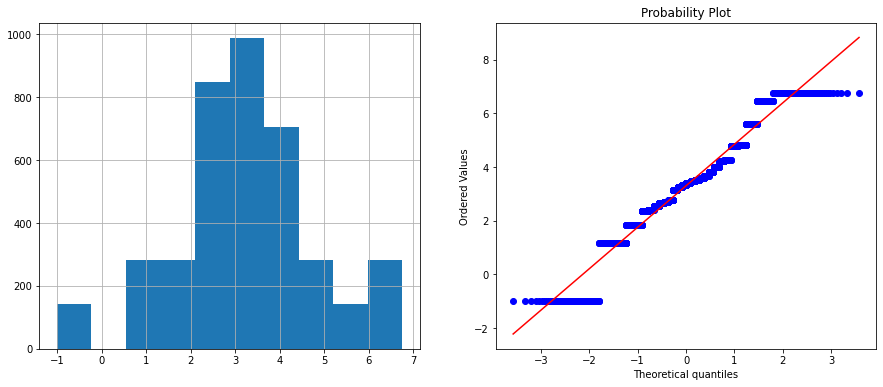

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for agri variable


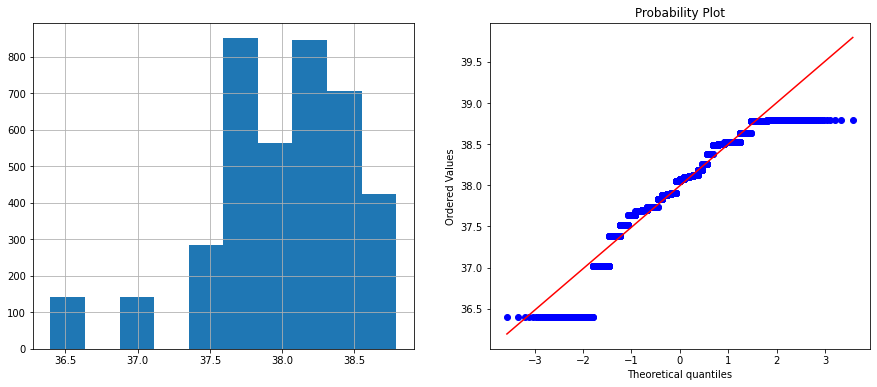

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for x variable


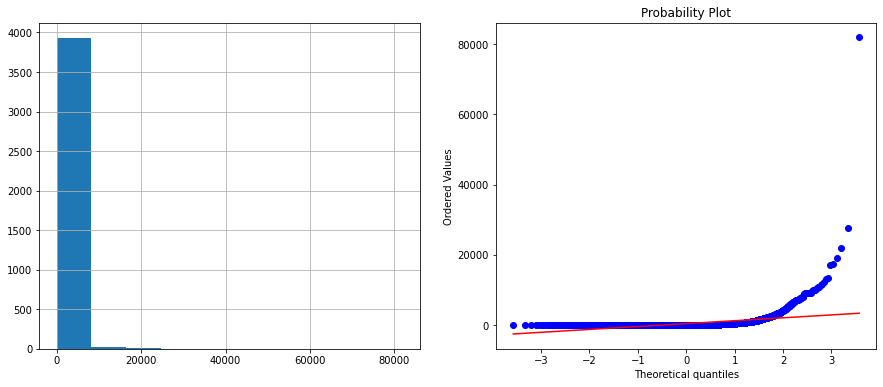

------------------------------------------------------------------------------------------------------------------------


In [20]:
from scipy import stats
for i in list(data.select_dtypes(include=np.number).columns):
  print('histogram and Q-Q plot for ' + i + ' variable')
  diagnostic_plots(data, i)
  print(split_plots(120))

The indepandants varialbes do not show a normality pattern, thing that can be noticed from plots above, since Q-Q plots do not urge to any fitting between the variable and the y = x line. That said, the best thing to think about in this regard is to look for transformation in such a manner to get this normality pattern for our variables, since then, we are likely gonna be using log transformation latter on.

In [21]:
data.head()

,algeria,morocco,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri,x
0,1,0,36.831024,3.676812,12.23,8121.33,2077.128,0.064,3,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,261.164593,2.705933,36.396158,2
1,1,0,33.493796,5.990477,40.08,2345.41,434513.588,0.343,2,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,263.494258,1.853971,37.017541,0
2,1,0,36.147910,5.163528,849.96,17563.14,69422.228,15.399,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,223.941148,1.827560,37.387474,4
3,1,0,35.172772,7.031942,935.64,8203.38,235988.172,5.334,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,197.605263,-1.009665,37.515919,0
4,1,0,35.728593,2.802241,629.23,5748.02,122453.152,23.814,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,203.566507,2.771483,37.694043,0


In [22]:
list1 = data[data['morocco'] == 1].index
list2 = data[data['algeria'] == 1].index
elems_in_both_lists = set(list1) & set(list2)

In [58]:
data.morocco.value_counts()

0    2932
1    1026
Name: morocco, dtype: int64

In [24]:
data.algeria.value_counts()

1    2261
0    1697
Name: algeria, dtype: int64

In [25]:
list1 = [i for i in range(3)]
list2 = [i for i in range(4)]
elems_in_both_lists = set(list1) & set(list2)
elems_in_both_lists

{0, 1, 2}

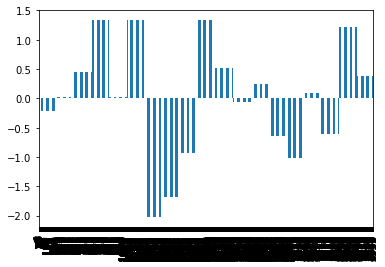

In [55]:
data.NAO.plot(kind='bar')

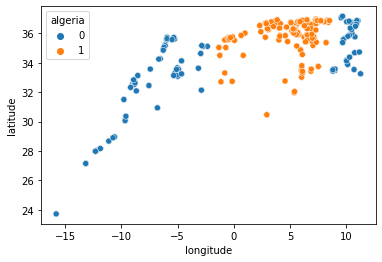

In [26]:
sns.scatterplot(x = 'longitude' , y = 'latitude' , hue= 'algeria' , data = data)

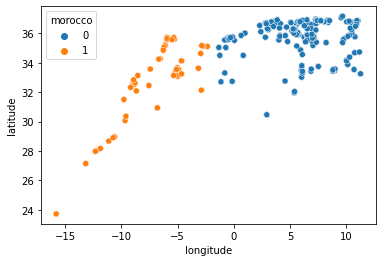

In [27]:
sns.scatterplot(x = 'longitude' , y = 'latitude' , hue= 'morocco' , data = data)

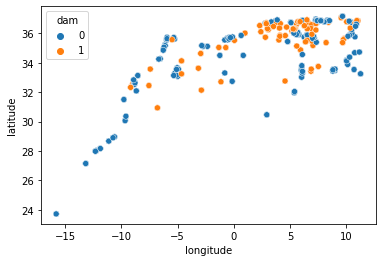

In [28]:
sns.scatterplot(x = 'longitude' , y = 'latitude' , hue= 'dam' , data = data)

Information about whether or not the site is a dam

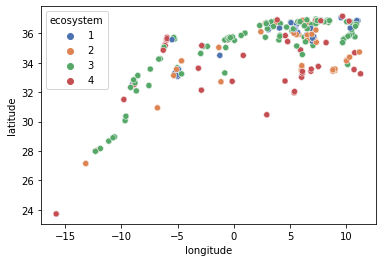

In [29]:
sns.scatterplot(x = 'longitude' , y = 'latitude' , hue= 'ecosystem' , data = data ,  palette="deep")

Information about how the ecosystems groups are scattered over Algeria and Morocco

In [30]:
np.round(data.ecosystem.value_counts()/data.shape[0]*100 , 2)

3    48.28
2    20.06
4    19.66
1    12.00
Name: ecosystem, dtype: float64

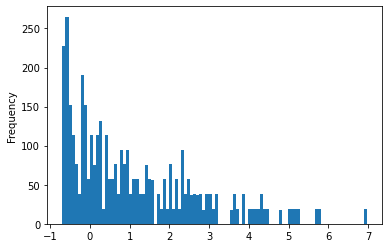

In [31]:
data.area.apply(lambda x : np.log(x + 0.5)).plot(kind='hist' , bins=100)

Distribution of Algeria:


1    0.571
0    0.429
Name: algeria, dtype: float64

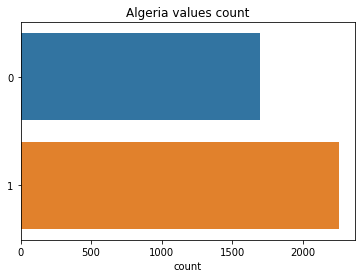

In [32]:
ax = sns.countplot(y=data.algeria.values).set(title='Algeria values count')

print('Distribution of Algeria:')
np.round(data.algeria.value_counts()/data.shape[0] , 3)

Distrubition of Morocco


0    0.741
1    0.259
Name: morocco, dtype: float64

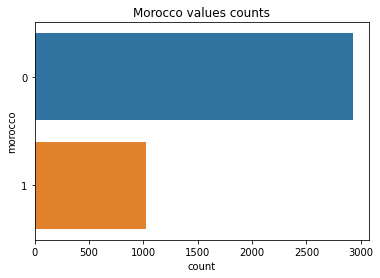

In [33]:
ax = sns.countplot(y=data.morocco).set(title = 'Morocco values counts')

print('Distrubition of Morocco')
np.round(data.morocco.value_counts()/data.shape[0] , 3)

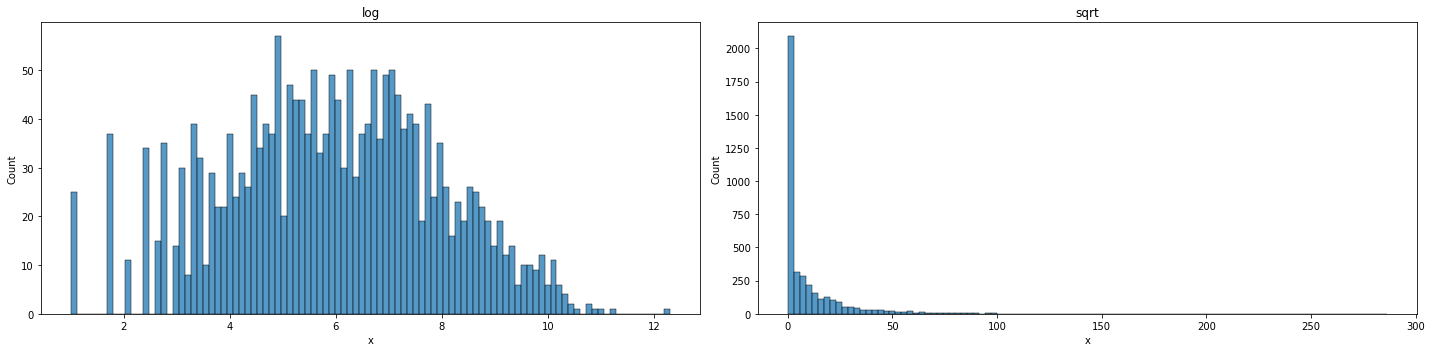

In [34]:
f , axes = plt.subplots(1,2, figsize=(20,5))
#log transformation seems to be the best
sns.histplot(data.x.apply(lambda x : np.log(x) + 1) , bins = 100, ax=axes[0]).set(title = 'log')
sns.histplot(np.sqrt(data.x) , bins = 100, ax=axes[1]).set(title = 'sqrt')


f.tight_layout()

We perceive a high skewness toward the target variable, so we do need to lessen this skewness for our favor in data modeling

In [35]:
data.skew(axis = 0, skipna = True)

algeria                 -0.288040
morocco                  1.099340
latitude                -1.959614
longitude               -0.745529
alt                      1.527660
dist_towns               4.980505
dist_coast               2.157059
area                    10.054473
ecosystem               -0.474812
dam                      0.519101
year                     0.001542
anomalies_t_print_NW     0.031096
anomalies_print_NE      -0.641234
anomalies_hiv_SW         0.464906
anomalies_hiv_SE         0.423017
p_NW_Europe              0.455744
p_NE_Europe              1.109352
NAO                     -0.344673
rain                     0.503426
economy                 -0.138692
agri                    -0.908148
x                       22.846962
dtype: float64

In [36]:
data.head()

,algeria,morocco,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri,x
0,1,0,36.831024,3.676812,12.23,8121.33,2077.128,0.064,3,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,261.164593,2.705933,36.396158,2
1,1,0,33.493796,5.990477,40.08,2345.41,434513.588,0.343,2,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,263.494258,1.853971,37.017541,0
2,1,0,36.147910,5.163528,849.96,17563.14,69422.228,15.399,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,223.941148,1.827560,37.387474,4
3,1,0,35.172772,7.031942,935.64,8203.38,235988.172,5.334,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,197.605263,-1.009665,37.515919,0
4,1,0,35.728593,2.802241,629.23,5748.02,122453.152,23.814,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,203.566507,2.771483,37.694043,0


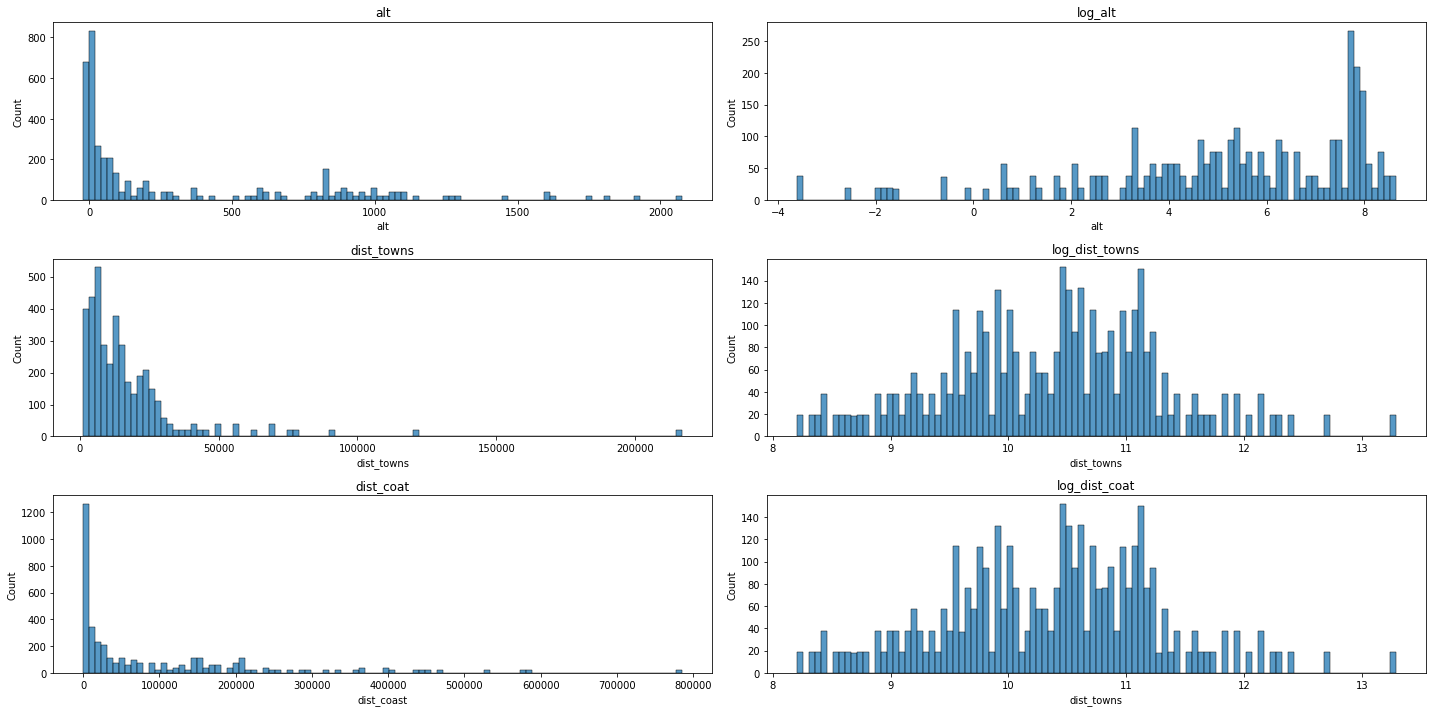

In [37]:
f, axes = plt.subplots(3, 2, figsize=(20,10))
# epsilon = 0.01

sns.histplot(data.alt, bins = 100, ax=axes[0][0]).set(title='alt')
sns.histplot(data.alt.apply(lambda x : np.log(x) + 1), bins = 100, ax=axes[0][1]).set(title='log_alt')

sns.histplot(data.dist_towns, bins = 100, ax=axes[1][0]).set(title='dist_towns')
sns.histplot(data.dist_towns.apply(lambda x : np.log(x) + 1), bins = 100, ax=axes[1][1]).set(title='log_dist_towns')

sns.histplot(data.dist_coast,  bins = 100, ax=axes[2][0]).set(title='dist_coat')
sns.histplot(data.dist_towns.apply(lambda x : np.log(x) + 1),  bins = 100, ax=axes[2][1]).set(title='log_dist_coat')

f.tight_layout()

For the case of alt we do have a left skewness that refers to the fact that the median is bigger than the mean thing the we will be handling using 

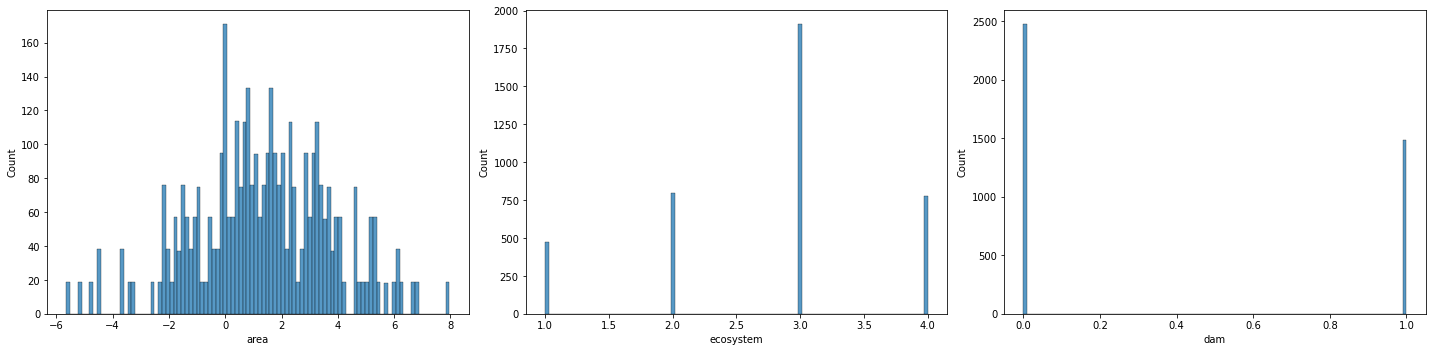

In [38]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(data.area.apply(lambda x : np.log(x) + 1), bins = 100, ax=axes[0])
sns.histplot(data.ecosystem, bins = 100, ax=axes[1])
sns.histplot(data.dam,  bins = 100, ax=axes[2])

f.tight_layout()

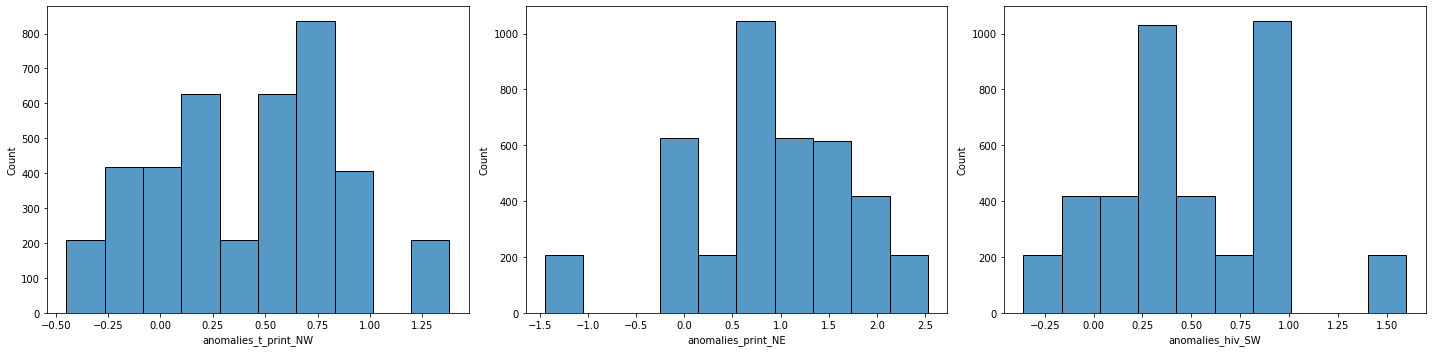

In [39]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(data.anomalies_t_print_NW, bins = 10, ax=axes[0])
sns.histplot(data.anomalies_print_NE,  bins = 10, ax=axes[1])
sns.histplot(data.anomalies_hiv_SW,  bins = 10, ax=axes[2])

f.tight_layout()

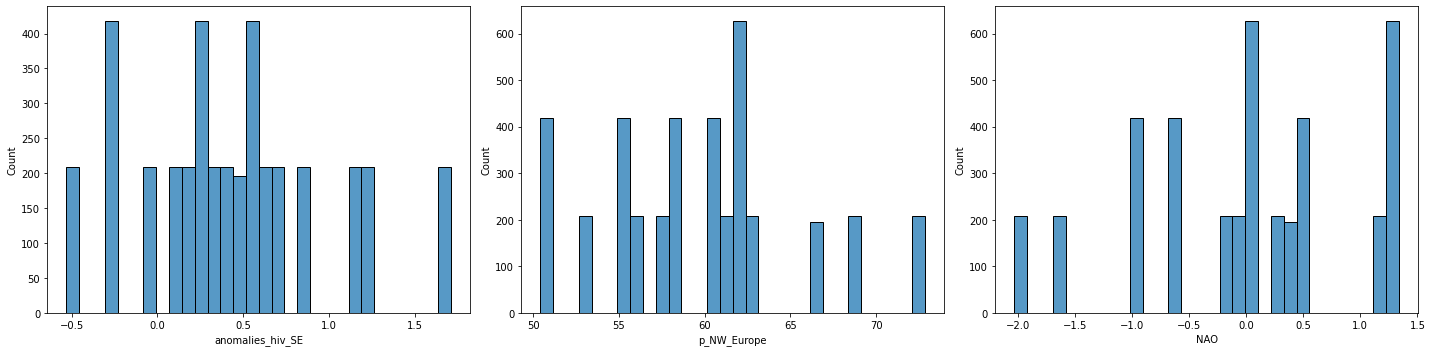

In [40]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(data.anomalies_hiv_SE, bins = 30, ax=axes[0])
sns.histplot(data.p_NW_Europe,  bins = 30, ax=axes[1])
sns.histplot(data.NAO,  bins = 30, ax=axes[2])

f.tight_layout()

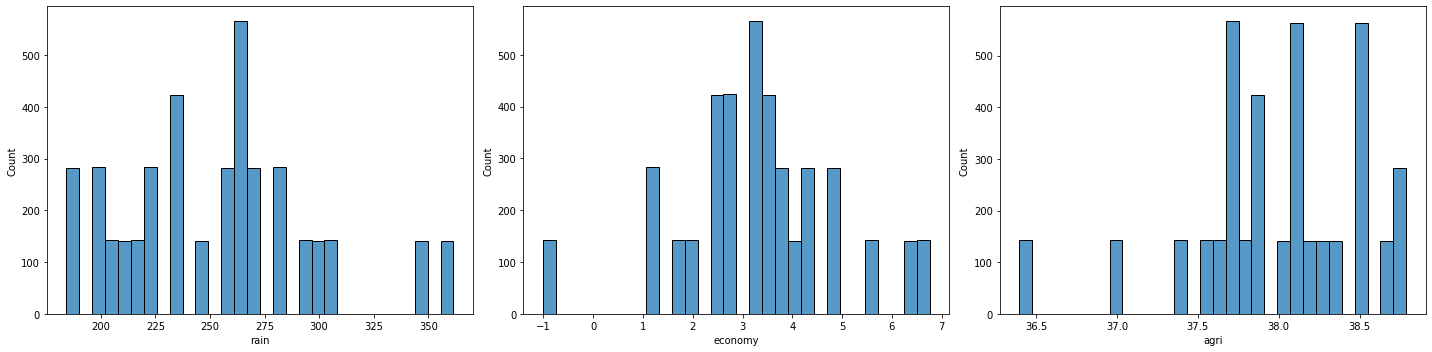

In [41]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(data.rain, bins = 30, ax=axes[0])
sns.histplot(data.economy,  bins = 30, ax=axes[1])
sns.histplot(data.agri,  bins = 30, ax=axes[2])

f.tight_layout()

In [42]:
data.x

0           2
1           0
2           4
3           0
4           0
        ...  
3953    81950
3954     1720
3955        4
3956       58
3957        0
Name: x, Length: 3958, dtype: int64

#Pre-processing 

Some machine learning models are fundamentally based on distance matrix, also known as the distance-based classifier, for example, K-Nearest-Neighbours, SVM, and Neural Network. Feature scaling is extremely essential to those models, especially when the range of the features is very different. Otherwise, features with a large range will have a large influence in computing the distance

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [63]:
data

,algeria,morocco,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri,x
0,1,0,36.831024,3.676812,12.23,8121.33,2077.128,0.064,3,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,261.164593,2.705933,36.396158,2
1,1,0,33.493796,5.990477,40.08,2345.41,434513.588,0.343,2,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,263.494258,1.853971,37.017541,0
2,1,0,36.147910,5.163528,849.96,17563.14,69422.228,15.399,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,223.941148,1.827560,37.387474,4
3,1,0,35.172772,7.031942,935.64,8203.38,235988.172,5.334,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,197.605263,-1.009665,37.515919,0
4,1,0,35.728593,2.802241,629.23,5748.02,122453.152,23.814,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,203.566507,2.771483,37.694043,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,0,0,36.611366,10.887952,-1.75,6304.45,965.154,3.427,3,0,2008,0.92,1.71,0.35,0.51,66.71,59.31,0.38,223.319617,1.170622,37.644043,81950
3954,0,0,33.245830,11.261433,0.00,15055.88,6075.019,301.550,4,0,2008,0.92,1.71,0.35,0.51,66.71,59.31,0.38,295.745933,6.762105,37.740067,1720
3955,0,0,36.474304,10.815580,0.05,3875.75,1255.895,0.593,3,0,2008,0.92,1.71,0.35,0.51,66.71,59.31,0.38,217.846890,1.160287,37.737005,4
3956,0,0,35.796711,10.142059,27.01,45208.10,50569.922,0.815,3,0,2008,0.92,1.71,0.35,0.51,66.71,59.31,0.38,304.188038,5.597799,37.897182,58


In [67]:
data.dist_coast.mean()

92526.35366093928

In [45]:
data.dist_coast.median()

27904.632999999998

In [46]:
plt.show()

#Data correlation

In [47]:
data.corr()

,algeria,morocco,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri,x
algeria,1.000000,-0.682812,0.416498,0.385214,0.177392,-0.256936,0.265362,0.013557,-0.063896,0.209290,0.006247,0.004141,0.003334,-0.001307,0.000518,0.004730,0.010772,0.001564,-0.001087,-0.000529,-0.003969,-0.006325
morocco,-0.682812,1.000000,-0.569762,-0.877644,0.038335,0.281534,-0.136156,-0.038165,0.123321,-0.186041,0.003202,0.002122,0.001709,-0.000670,0.000265,0.002424,0.005520,0.000801,0.001224,0.001669,0.003056,-0.022337
latitude,0.416498,-0.569762,1.000000,0.645244,-0.038177,-0.638712,-0.298006,0.012799,-0.128160,0.229448,-0.000549,-0.000364,-0.000293,0.000115,-0.000045,-0.000415,-0.000946,-0.000137,-0.006009,-0.012143,0.007510,0.004248
longitude,0.385214,-0.877644,0.645244,1.000000,-0.062292,-0.353353,0.095776,0.058523,-0.128570,0.149600,-0.006090,-0.004037,-0.003250,0.001274,-0.000505,-0.004611,-0.010500,-0.001524,-0.003801,-0.006308,0.000947,0.026990
alt,0.177392,0.038335,-0.038177,-0.062292,1.000000,0.053089,0.389731,-0.001124,-0.389841,0.169860,0.003641,0.002413,0.001943,-0.000762,0.000302,0.002757,0.006278,0.000911,0.006910,0.013416,-0.001139,-0.006403
dist_towns,-0.256936,0.281534,-0.638712,-0.353353,0.053089,1.000000,0.034041,0.040024,0.075235,-0.156650,0.000531,0.000352,0.000284,-0.000111,0.000044,0.000402,0.000916,0.000133,0.011670,0.018352,-0.005608,0.001810
dist_coast,0.265362,-0.136156,-0.298006,0.095776,0.389731,0.034041,1.000000,0.019076,0.067568,0.048694,0.002293,0.001520,0.001224,-0.000480,0.000190,0.001736,0.003954,0.000574,0.005788,0.010082,-0.010574,-0.000502
area,0.013557,-0.038165,0.012799,0.058523,-0.001124,0.040024,0.019076,1.000000,0.111238,-0.089592,0.000132,0.000087,0.000070,-0.000028,0.000011,0.000100,0.000227,0.000033,-0.005910,-0.012136,0.013695,-0.005386
ecosystem,-0.063896,0.123321,-0.128160,-0.128570,-0.389841,0.075235,0.067568,0.111238,1.000000,-0.153163,-0.000080,-0.000053,-0.000042,0.000017,-0.000007,-0.000060,-0.000137,-0.000020,-0.007732,-0.014316,-0.011538,0.002295
dam,0.209290,-0.186041,0.229448,0.149600,0.169860,-0.156650,0.048694,-0.089592,-0.153163,1.000000,0.004187,0.002775,0.002235,-0.000876,0.000347,0.003170,0.007220,0.001048,-0.000610,0.003926,0.003935,-0.019744


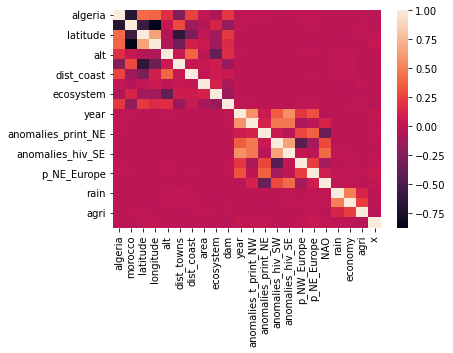

In [48]:
corr_matrix = data.corr()
response_corr = corr_matrix['x']
top_corr_features = response_corr[response_corr.abs() > 0].index

sns.heatmap(corr_matrix.loc[top_corr_features , top_corr_features])

In [49]:
response_corr.sort_values(ascending = False)

x                       1.000000
p_NE_Europe             0.047740
longitude               0.026990
year                    0.018743
NAO                     0.017037
p_NW_Europe             0.012350
anomalies_print_NE      0.011573
anomalies_t_print_NW    0.008859
latitude                0.004248
ecosystem               0.002295
dist_towns              0.001810
economy                 0.000968
dist_coast             -0.000502
rain                   -0.000795
anomalies_hiv_SE       -0.000980
anomalies_hiv_SW       -0.004703
area                   -0.005386
algeria                -0.006325
alt                    -0.006403
dam                    -0.019744
agri                   -0.019879
morocco                -0.022337
Name: x, dtype: float64